In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/ltksjtb54wrov5q/HeartDisease.csv?dl=1')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df['oldpeak'] = df['oldpeak'].astype(int)

display(df.dtypes)

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,0.796098,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.085408,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

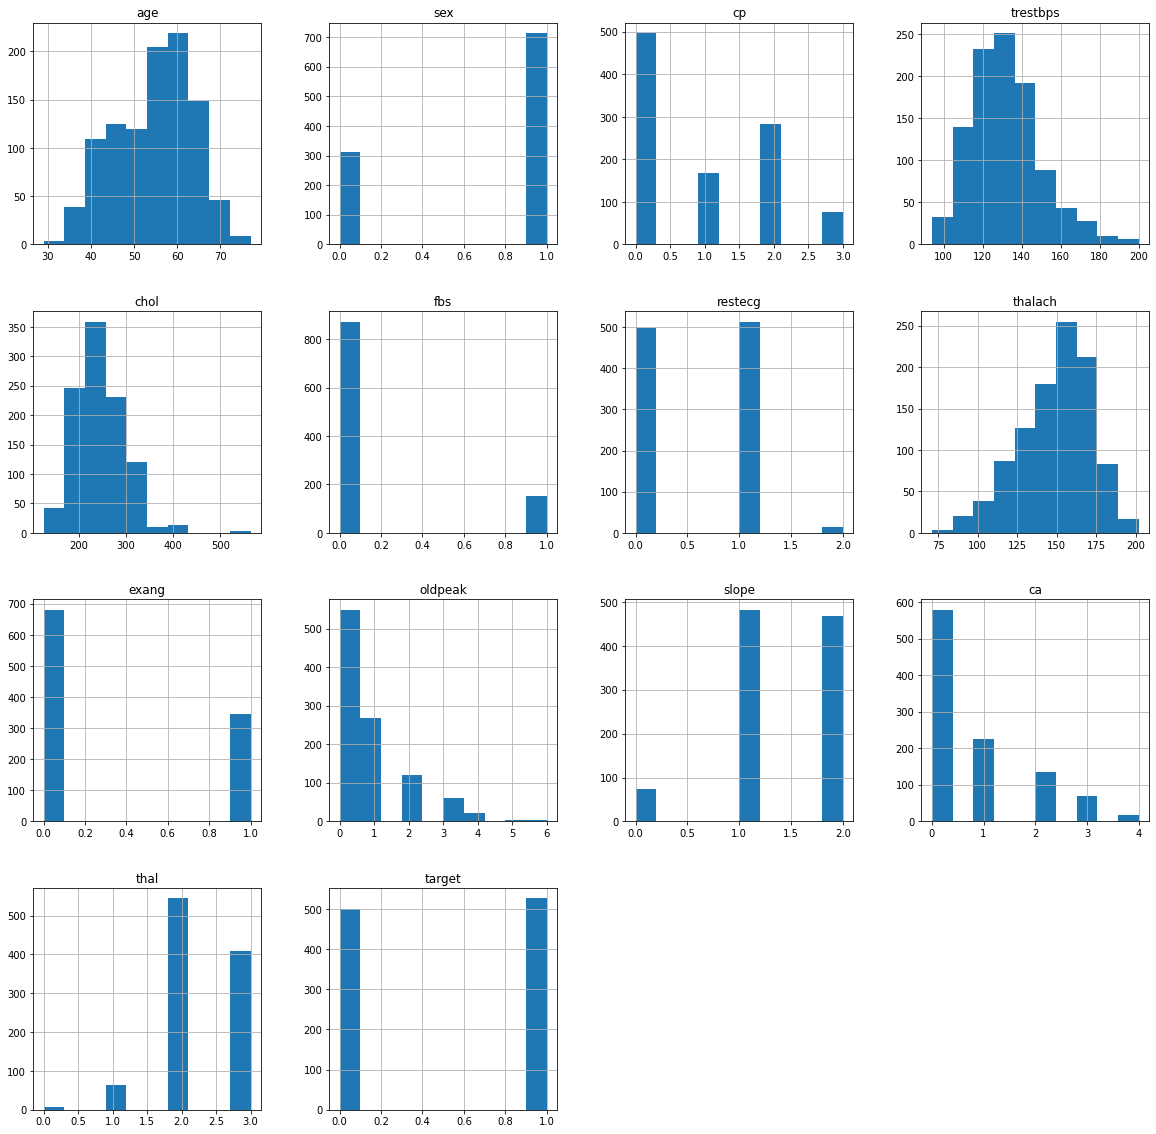

In [9]:
df.hist(figsize = (20,20))
plt.show()

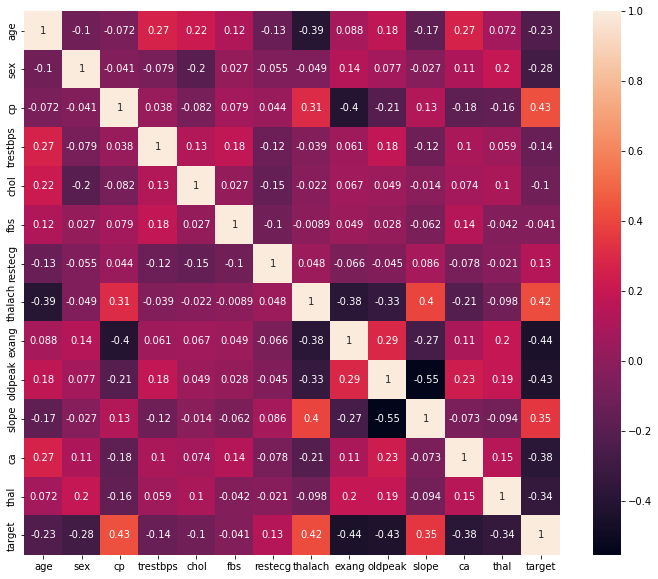

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

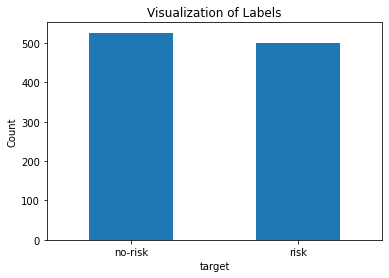

In [12]:
labels = ["no-risk", "risk"]
count_classes = df.value_counts(df['target'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [13]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']].values 
y = df['target'].values

In [14]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, y, test_size = 0.25, random_state = 50)

print("Shape of train_X: " ,train_X.shape)
print("Shape of test_X: " ,test_X.shape)

Shape of train_X:  (768, 13)
Shape of test_X:  (257, 13)


In [29]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC as svc
from sklearn.metrics import accuracy_score, precision_score

**Decision** **Tree**





In [17]:
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y)
dt_predict = dt.predict(test_X)

In [18]:
accuracy_dt = accuracy_score(test_Y, dt_predict)
precision_score_dt = precision_score(test_Y, dt_predict)
print("precision score of Decision tree model :" , precision_score_dt)
print("Accuracy of Decision tree model :" , accuracy_dt)

precision score of Decision tree model : 1.0
Accuracy of Decision tree model : 0.9766536964980544


**SVM**

In [30]:
svc = svc(kernel='poly', degree=7) 
svc.fit(train_X, train_Y)
svc_predict = svc.predict(test_X) 

In [31]:
accuracy_svc = accuracy_score(test_Y, svc_predict)
precision_score_svc = precision_score(test_Y, svc_predict)
print("precision score of SVM model :" , precision_score_svc)
print("Accuracy of SVM model :" , accuracy_svc)

precision score of SVM model : 0.7256637168141593
Accuracy of SVM model : 0.6536964980544747


**KNN**

In [32]:
n = 7
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(train_X, train_Y)
knn_predict = knn.predict(test_X)

In [33]:
accuracy_knn = accuracy_score(test_Y, knn_predict)
precision_score_knn = precision_score(test_Y, knn_predict)
print("precision score of KNN model :" , precision_score_knn)
print("Accuracy of KNN model :" , accuracy_knn)

precision score of KNN model : 0.7286821705426356
Accuracy of KNN model : 0.6848249027237354
